In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import imblearn
import math

# Import data

In [2]:
spend_excel=pd.read_excel('advertising_spend_data.xlsx')
adv_spend=pd.DataFrame(spend_excel.values.tolist()[2:],columns=spend_excel.values.tolist()[1])
adv_spend

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100
1,2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600
2,2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800
3,2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400
4,2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300
5,2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300
6,2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000
7,2020-01-31,49000,75500,33600,22700,14300,300,6700,7400
8,2020-02-29,49700,76600,30100,21700,15000,300,6400,6500
9,2020-03-31,49100,78000,22700,21200,17600,300,5900,10000


In [3]:
cust_rep=pd.read_pickle('customer_service_reps')
cust_rep

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [64]:
cust_rep.columns

Index(['customer_service_rep_id', 'subid', 'current_sub_TF', 'cancel_date',
       'account_creation_date', 'num_trial_days', 'trial_completed_TF',
       'billing_channel', 'revenue_net_1month', 'payment_period',
       'last_payment', 'next_payment', 'renew', 'status'],
      dtype='object')

In [4]:
sub = pd.read_pickle("subscribers")
sub

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


In [5]:
sub.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type'],
      dtype='object')

In [6]:
eng= pd.read_pickle("engagement")
eng

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
28832315,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832317,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832319,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0
28832321,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0


# A/B testing

- No Trial Fee vs Discounted Trial Fee
- 7 Day Trial Period vs 14 Day Trial Period 

In [7]:
from scipy import stats as st

In [8]:
# confidence level 90%
# power 80%
alpha = 0.1
z_alpha = st.norm.ppf(1-(alpha/2))
print('z alpha: %f'%(z_alpha))

beta = 1-0.8
z_beta = st.norm.ppf(1-beta)
print('z beta: %f'%(z_beta))

z alpha: 1.644854
z beta: 0.841621


In [9]:
def optimal_size(x, y):
    p_hat = (x + y) / 2
    delta = abs(x - y)
    opt_size = ((z_alpha*math.sqrt(2*p_hat*(1-p_hat)) + z_beta * math.sqrt(x*(1-x) + y *(1-y)))**2 ) / delta**2
    return opt_size

In [10]:
sub['plan_type'].value_counts()

base_uae_14_day_trial                227096
high_uae_14_day_trial                   325
low_uae_no_trial                        167
base_eur_14_day_trial                    18
high_sar_14_day_trial                    12
low_gbp_14_day_trial                      4
high_aud_14_day_trial                     2
base_uae_no_trial_7_day_guarantee         1
low_eur_no_trial                          1
low_sar_no_trial                          1
high_jpy_14_day_trial                     1
Name: plan_type, dtype: int64

#### base_uae_14_day_trial   vs   high_uae_14_day_trial

In [11]:
sub['cancel_before_trial_end'].isnull().sum()

0

In [12]:
sub['refund_after_trial_TF'].isnull().sum()

0

In [13]:
base_plan=sub[sub.plan_type=='base_uae_14_day_trial']
high_plan=sub[sub.plan_type=='high_uae_14_day_trial']

base_rate=len(base_plan[(base_plan['cancel_before_trial_end'] == True) & (base_plan['refund_after_trial_TF'] == False)])/len(base_plan)
high_rate=len(high_plan[(high_plan['cancel_before_trial_end'] == True) & (high_plan['refund_after_trial_TF'] == False)])/len(high_plan)

In [14]:
z = (high_rate - base_rate) / math.sqrt((base_rate * (1- base_rate))/len(high_plan))
z

-1.8665653571328882

Reject Null hypothesis

In [15]:
# optimal size
optimal_size(high_rate, base_rate)

1128.4692174488289

sample size not enough

#### 7 day trial vs 14 day trial

In [16]:
days_trial = cust_rep.groupby(['subid', 'num_trial_days', 'revenue_net_1month']).payment_period.max().reset_index()
days_trial

,subid,num_trial_days,revenue_net_1month,payment_period
0,20000002,14,0.0000,0
1,20000003,14,0.0000,0
2,20000007,14,0.0000,0
3,20000014,14,0.0000,0
4,20000031,14,0.0000,0
...,...,...,...,...
1369355,29999986,14,2.4589,2
1369356,29999991,14,0.0000,1
1369357,29999993,14,0.0000,0
1369358,29999997,14,0.0000,0


In [17]:
days_trial['num_trial_days'].value_counts()

14    1281127
7       64043
0       24190
Name: num_trial_days, dtype: int64

In [18]:
trial_7=days_trial[days_trial.num_trial_days==7].reset_index(drop=True)
trial_7['convert']=trial_7['revenue_net_1month'].apply(lambda x: True if x>0 else False)

In [19]:
trial_14=days_trial[days_trial.num_trial_days==14].reset_index(drop=True)
trial_14['convert']=trial_14['revenue_net_1month'].apply(lambda x: True if x>0 else False)

In [20]:
rate_7=len(trial_7[trial_7['convert'] == True])/len(trial_7)
rate_14=len(trial_14[trial_14['convert'] == True])/len(trial_14)

In [21]:
z = (rate_7 - rate_14) / math.sqrt((rate_14 * (1- rate_14))/len(trial_7))
z

89.4796493299452

reject null

In [22]:
#optimal size
optimal_size(rate_7, rate_14)

103.42906705904839

sample size is big enough

# Churn Modelling

In [23]:
eng=eng.drop('payment_period',axis=1)

In [24]:
sum_eng=eng.groupby('subid').sum().reset_index()
sum_eng

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
0,20000062,4.0,3.0,6.0,23.0,0.0,1.0
1,20000405,5.0,4.0,13.0,17.0,0.0,1.0
2,20000604,14.0,5.0,8.0,68.0,0.0,1.0
3,20000685,46.0,10.0,14.0,165.0,0.0,8.0
4,20000741,1.0,1.0,2.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...
135014,29999740,15.0,3.0,11.0,31.0,0.0,0.0
135015,29999820,12.0,6.0,22.0,50.0,0.0,7.0
135016,29999822,5.0,4.0,2.0,25.0,0.0,1.0
135017,29999889,245.0,45.0,326.0,326.0,40.0,68.0


In [25]:
small_sub=sub[['subid', 'package_type','preferred_genre', 'intended_use', 'weekly_consumption_hour','retarget_TF', 'male_TF','attribution_technical', 'op_sys',]]

In [26]:
full_info=pd.merge(small_sub,sum_eng,how='inner',on='subid')
full_info

,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,retarget_TF,male_TF,attribution_technical,op_sys,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
0,26844789,enhanced,regional,replace OTT,36.001186,False,True,organic,iOS,2.0,2.0,13.0,13.0,0.0,1.0
1,29726122,base,comedy,access to exclusive content,20.051667,False,False,bing,Android,40.0,17.0,182.0,182.0,6.0,39.0
2,20299962,base,drama,access to exclusive content,34.551230,False,False,email,iOS,104.0,10.0,84.0,206.0,0.0,29.0
3,24930568,base,comedy,access to exclusive content,25.851492,False,False,facebook,iOS,3.0,3.0,2.0,13.0,0.0,0.0
4,21361112,enhanced,comedy,access to exclusive content,37.451142,False,True,search,iOS,4.0,3.0,2.0,12.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135014,21928274,base,drama,replace OTT,NaN,False,False,facebook,Android,50.0,16.0,92.0,176.0,3.0,22.0
135015,25549852,enhanced,comedy,access to exclusive content,28.751405,False,False,affiliate,Android,1.0,2.0,0.0,6.0,0.0,0.0
135016,25835684,base,drama,access to exclusive content,24.401536,False,False,email,iOS,31.0,5.0,47.0,59.0,0.0,8.0
135017,21434712,enhanced,comedy,supplement OTT,28.751405,False,False,facebook,iOS,16.0,3.0,20.0,36.0,0.0,2.0


In [27]:
for col in list(full_info.columns):
    print(col)
    print(full_info[col].isnull().sum())

subid
0
package_type
25669
preferred_genre
25949
intended_use
2052
weekly_consumption_hour
24085
retarget_TF
0
male_TF
0
attribution_technical
0
op_sys
5
app_opens
0
cust_service_mssgs
0
num_videos_completed
0
num_videos_more_than_30_seconds
0
num_videos_rated
0
num_series_started
0


In [28]:
full_info['package_type']=full_info['package_type'].fillna('Not_Given')



full_info['preferred_genre'].value_counts(normalize=True)

full_info['preferred_genre'] = full_info['preferred_genre'].fillna(pd.Series(np.random.choice(['comedy', 'drama', 'regional','international','other'], 
                                                      p=[0.65, 0.24, 0.052,0.033,0.025], size=len(full_info))))

full_info['intended_use'].value_counts(normalize=True)

full_info['intended_use'] = full_info['intended_use'].fillna(pd.Series(np.random.choice(['access to exclusive content', 'replace OTT', 'supplement OTT','expand regional access','expand international access','education','other'], 
                                                      p=[0.40, 0.28, 0.11,0.085,0.071,0.027,0.027], size=len(full_info))))

full_info['op_sys'].fillna('iOS',inplace=True)

#full_info['preferred_genre']=full_info['preferred_genre'].fillna('Not_Given')
#full_info['intended_use']=full_info['intended_use'].fillna('Not_Given')
full_info['weekly_consumption_hour']=full_info['weekly_consumption_hour'].fillna(full_info['weekly_consumption_hour'].mean())

In [29]:
full_info=full_info.dropna(axis=0,subset = ['op_sys'])

In [30]:
full_info.columns

Index(['subid', 'package_type', 'preferred_genre', 'intended_use',
       'weekly_consumption_hour', 'retarget_TF', 'male_TF',
       'attribution_technical', 'op_sys', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started'],
      dtype='object')

In [31]:
full_info=full_info[['subid','package_type', 'preferred_genre', 'intended_use', 'retarget_TF', 'male_TF','attribution_technical', 'op_sys','weekly_consumption_hour','app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds','num_videos_rated', 'num_series_started']]
full_info

,subid,package_type,preferred_genre,intended_use,retarget_TF,male_TF,attribution_technical,op_sys,weekly_consumption_hour,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
0,26844789,enhanced,regional,replace OTT,False,True,organic,iOS,36.001186,2.0,2.0,13.0,13.0,0.0,1.0
1,29726122,base,comedy,access to exclusive content,False,False,bing,Android,20.051667,40.0,17.0,182.0,182.0,6.0,39.0
2,20299962,base,drama,access to exclusive content,False,False,email,iOS,34.551230,104.0,10.0,84.0,206.0,0.0,29.0
3,24930568,base,comedy,access to exclusive content,False,False,facebook,iOS,25.851492,3.0,3.0,2.0,13.0,0.0,0.0
4,21361112,enhanced,comedy,access to exclusive content,False,True,search,iOS,37.451142,4.0,3.0,2.0,12.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135014,21928274,base,drama,replace OTT,False,False,facebook,Android,27.956766,50.0,16.0,92.0,176.0,3.0,22.0
135015,25549852,enhanced,comedy,access to exclusive content,False,False,affiliate,Android,28.751405,1.0,2.0,0.0,6.0,0.0,0.0
135016,25835684,base,drama,access to exclusive content,False,False,email,iOS,24.401536,31.0,5.0,47.0,59.0,0.0,8.0
135017,21434712,enhanced,comedy,supplement OTT,False,False,facebook,iOS,28.751405,16.0,3.0,20.0,36.0,0.0,2.0


In [32]:
cust_rep['current_sub_TF'].isnull().sum()

0

In [33]:
cust_rep['status']=cust_rep['current_sub_TF'].apply(lambda x: 1 if x== True else 0)
small_cust_rep=cust_rep[['subid','status']]
small_cust_rep=small_cust_rep.reset_index(drop=True)

In [34]:
small_cust_rep['status'].value_counts()

0    1390355
1     818288
Name: status, dtype: int64

In [35]:
cust_rep_output=small_cust_rep.groupby('subid').mean()

In [36]:
to_dummy=pd.merge(full_info,cust_rep_output,how='inner',on='subid')
to_dummy

,subid,package_type,preferred_genre,intended_use,retarget_TF,male_TF,attribution_technical,op_sys,weekly_consumption_hour,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,status
0,26844789,enhanced,regional,replace OTT,False,True,organic,iOS,36.001186,2.0,2.0,13.0,13.0,0.0,1.0,0
1,29726122,base,comedy,access to exclusive content,False,False,bing,Android,20.051667,40.0,17.0,182.0,182.0,6.0,39.0,1
2,20299962,base,drama,access to exclusive content,False,False,email,iOS,34.551230,104.0,10.0,84.0,206.0,0.0,29.0,1
3,24930568,base,comedy,access to exclusive content,False,False,facebook,iOS,25.851492,3.0,3.0,2.0,13.0,0.0,0.0,0
4,21361112,enhanced,comedy,access to exclusive content,False,True,search,iOS,37.451142,4.0,3.0,2.0,12.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135014,21928274,base,drama,replace OTT,False,False,facebook,Android,27.956766,50.0,16.0,92.0,176.0,3.0,22.0,1
135015,25549852,enhanced,comedy,access to exclusive content,False,False,affiliate,Android,28.751405,1.0,2.0,0.0,6.0,0.0,0.0,0
135016,25835684,base,drama,access to exclusive content,False,False,email,iOS,24.401536,31.0,5.0,47.0,59.0,0.0,8.0,0
135017,21434712,enhanced,comedy,supplement OTT,False,False,facebook,iOS,28.751405,16.0,3.0,20.0,36.0,0.0,2.0,0


In [37]:
def get_dummy(data,categorical):
    dummy_df=pd.get_dummies(data,columns=categorical,
                       prefix=categorical,
                       prefix_sep='_',
                       dummy_na=False,
                       drop_first=False)
    return dummy_df

In [38]:
cate=['package_type', 'preferred_genre', 'intended_use', 'retarget_TF', 'male_TF','attribution_technical', 'op_sys']
to_clf=get_dummy(to_dummy,cate)
to_clf

,subid,weekly_consumption_hour,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,status,package_type_Not_Given,...,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_twitter,attribution_technical_vod,attribution_technical_youtube,op_sys_Android,op_sys_iOS
0,26844789,36.001186,2.0,2.0,13.0,13.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,29726122,20.051667,40.0,17.0,182.0,182.0,6.0,39.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,20299962,34.551230,104.0,10.0,84.0,206.0,0.0,29.0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,24930568,25.851492,3.0,3.0,2.0,13.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,21361112,37.451142,4.0,3.0,2.0,12.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135014,21928274,27.956766,50.0,16.0,92.0,176.0,3.0,22.0,1,0,...,0,0,0,0,0,0,0,0,1,0
135015,25549852,28.751405,1.0,2.0,0.0,6.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
135016,25835684,24.401536,31.0,5.0,47.0,59.0,0.0,8.0,0,0,...,0,0,0,0,0,0,0,0,0,1
135017,21434712,28.751405,16.0,3.0,20.0,36.0,0.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
#to_clf=to_clf.drop('subid',axis=1)

In [40]:
X=to_clf.drop(['status','subid'],axis=1)
Y=to_clf['status']

In [41]:
from sklearn.model_selection import train_test_split

#Train test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 1)

In [42]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [43]:
def plt_roc_curve(v1,v2):
    logit_roc_auc = roc_auc_score(Y_test, v1)
    fpr, tpr, thresholds = roc_curve(Y_test, v2)
    plt.figure()
    plt.plot(fpr, tpr,label='Area = %0.3f' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C=100)
lg.fit(X_train, Y_train)
y_pred = lg.predict(X_test)

print("Accuracy for Log Reg Training set: %.5f" %(lg.score(X_train,Y_train)))
print("Accuracy for Log Reg Tree Test set: %.5f" %(lg.score(X_test,Y_test)))

print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(f1_score(Y_test,y_pred))

Accuracy for Log Reg Training set: 0.83520
Accuracy for Log Reg Tree Test set: 0.83800
[[28524  2336]
 [ 4226  5420]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     30860
           1       0.70      0.56      0.62      9646

    accuracy                           0.84     40506
   macro avg       0.78      0.74      0.76     40506
weighted avg       0.83      0.84      0.83     40506

0.6229169061027469


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [45]:
index = 0
for i in lg.coef_[0]:
    print("%s      %.5f" %(X_train.columns[index],i))
    index += 1

weekly_consumption_hour      -0.04238
app_opens      -0.00013
cust_service_mssgs      -0.02437
num_videos_completed      -0.00459
num_videos_more_than_30_seconds      0.02284
num_videos_rated      0.01723
num_series_started      -0.01164
package_type_Not_Given      -1.16775
package_type_base      0.23172
package_type_economy      0.19108
package_type_enhanced      0.32383
preferred_genre_comedy      -0.18070
preferred_genre_drama      -0.16075
preferred_genre_international      -0.02177
preferred_genre_other      -0.03021
preferred_genre_regional      -0.02770
intended_use_access to exclusive content      0.38396
intended_use_education      -0.18573
intended_use_expand international access      -0.45731
intended_use_expand regional access      -0.53797
intended_use_other      -0.02207
intended_use_replace OTT      0.21685
intended_use_supplement OTT      0.18115
retarget_TF_False      -0.40201
retarget_TF_True      -0.01912
male_TF_False      -0.80019
male_TF_True      0.37907
attribut

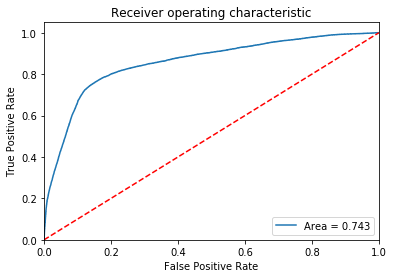

In [46]:
#ROC
plt_roc_curve(lg.predict(X_test),lg.predict_proba(X_test)[:,1])

### Tree-based Models

#### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [48]:
from sklearn.model_selection import GridSearchCV

param_test = {
        'max_depth': [2,3,4,5,6], 'max_features': [8,10,12,14]
    }

estimator = DecisionTreeClassifier(random_state = 0,min_samples_leaf=30)
gsearch = GridSearchCV(estimator, param_grid = param_test, cv=10)
gsearch.fit(X_train,Y_train)
print(gsearch.best_params_)

{'max_depth': 6, 'max_features': 8}


In [49]:
tree_1 = DecisionTreeClassifier(criterion='entropy',max_depth = 6, max_features = 8,min_samples_leaf=30)
tree_1.fit(X_train,Y_train)

print("Accuracy for Decision Tree Training set: %.5f" %(tree_1.score(X_train,Y_train)))
print("Accuracy for Decision Tree Test set: %.5f" %(tree_1.score(X_test,Y_test)))

print(confusion_matrix(Y_test,tree_1.predict(X_test)))
print(classification_report(Y_test,tree_1.predict(X_test)))
print(f1_score(Y_test,tree_1.predict(X_test)))

Accuracy for Decision Tree Training set: 0.85173
Accuracy for Decision Tree Test set: 0.85580
[[26866  3994]
 [ 1847  7799]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90     30860
           1       0.66      0.81      0.73      9646

    accuracy                           0.86     40506
   macro avg       0.80      0.84      0.81     40506
weighted avg       0.87      0.86      0.86     40506

0.7275525910723448


In [50]:
#feature importance
columns = X.columns
for i in range(len(columns)):
    print(columns[i])
    print(tree_1.feature_importances_[i])

weekly_consumption_hour
0.1811156144406919
app_opens
0.005219722192035445
cust_service_mssgs
0.003541510507084304
num_videos_completed
0.024019142538559912
num_videos_more_than_30_seconds
0.6570934941315615
num_videos_rated
0.0
num_series_started
0.002310364255209643
package_type_Not_Given
0.09803383453254666
package_type_base
5.040787600852756e-05
package_type_economy
0.0
package_type_enhanced
0.0
preferred_genre_comedy
0.00041312041889701506
preferred_genre_drama
0.0
preferred_genre_international
0.0
preferred_genre_other
0.0001176322889305382
preferred_genre_regional
0.0
intended_use_access to exclusive content
0.0008269586142895818
intended_use_education
0.0
intended_use_expand international access
1.5073578182611399e-06
intended_use_expand regional access
0.0
intended_use_other
0.0
intended_use_replace OTT
0.00043091106324936237
intended_use_supplement OTT
0.0
retarget_TF_False
0.0
retarget_TF_True
0.0002184694129385555
male_TF_False
0.0035033952980542075
male_TF_True
0.0114511585

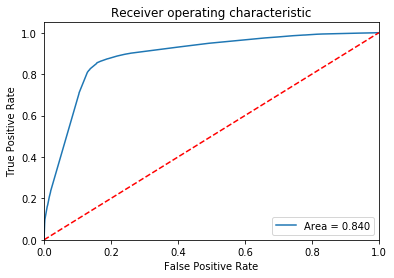

In [51]:
#ROC
plt_roc_curve(tree_1.predict(X_test),tree_1.predict_proba(X_test)[:,1])

### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf_1 =RandomForestClassifier(n_estimators=20,criterion="entropy",max_depth=8,max_features=12,min_samples_leaf=30)
rf_1.fit(X_train,Y_train)

print("Accuracy for Random Forest Training set: %.5f" %(rf_1.score(X_train,Y_train)))
print("Accuracy for Random Forest Test set: %.5f" %(rf_1.score(X_test,Y_test)))

print(confusion_matrix(Y_test,rf_1.predict(X_test)))
print(classification_report(Y_test,rf_1.predict(X_test)))

Accuracy for Random Forest Training set: 0.85276
Accuracy for Random Forest Test set: 0.85429
[[27903  2957]
 [ 2945  6701]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     30860
           1       0.69      0.69      0.69      9646

    accuracy                           0.85     40506
   macro avg       0.80      0.80      0.80     40506
weighted avg       0.85      0.85      0.85     40506



In [54]:
param_test = {
        'max_depth': [4,5,6,7,8], 'max_features': [6,8,10,12]
    }

estimator = RandomForestClassifier(random_state = 0,n_estimators=10)
gsearch = GridSearchCV(estimator, param_grid = param_test, cv=10)
gsearch.fit(X_train,Y_train)
print(gsearch.best_params_)

{'max_depth': 8, 'max_features': 12}


In [55]:
#Feature Importance
columns = X_train.columns
for i in range(len(columns)):
    print(columns[i])
    print(rf_1.feature_importances_[i])

weekly_consumption_hour
0.08751570608953067
app_opens
0.062078180617636515
cust_service_mssgs
0.05204245409739818
num_videos_completed
0.07387032226169779
num_videos_more_than_30_seconds
0.3588284456136469
num_videos_rated
0.03490184720520008
num_series_started
0.19325576768874317
package_type_Not_Given
0.052437153639995314
package_type_base
0.0038383384199531592
package_type_economy
0.0007072926209686069
package_type_enhanced
0.0015798139666955997
preferred_genre_comedy
0.001114989243517175
preferred_genre_drama
0.000272402752049771
preferred_genre_international
5.039506408864734e-05
preferred_genre_other
5.1909992054914556e-05
preferred_genre_regional
0.00018639831638474474
intended_use_access to exclusive content
0.01158780881746039
intended_use_education
0.001368547826330739
intended_use_expand international access
0.013862604860083038
intended_use_expand regional access
0.015144062241492628
intended_use_other
7.914134641450194e-05
intended_use_replace OTT
0.002858396981875489
inte

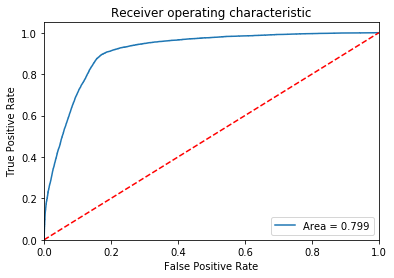

In [56]:
#ROC
plt_roc_curve(rf_1.predict(X_test),rf_1.predict_proba(X_test)[:,1])

### GBDT

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gb_1 =GradientBoostingClassifier(n_estimators=50,max_depth=4,min_samples_leaf=30,max_features=8)
gb_1.fit(X_train,Y_train)

print("Accuracy for GBDT Training set: %.5f" %(gb_1.score(X_train,Y_train)))
print("Accuracy for GBDT Test set: %.5f" %(gb_1.score(X_test,Y_test)))

print(confusion_matrix(Y_train,gb_1.predict(X_train)))
print(classification_report(Y_test,gb_1.predict(X_test)))

Accuracy for GBDT Training set: 0.85110
Accuracy for GBDT Test set: 0.85276
[[65370  6434]
 [ 7639 15070]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     30860
           1       0.70      0.67      0.68      9646

    accuracy                           0.85     40506
   macro avg       0.80      0.79      0.79     40506
weighted avg       0.85      0.85      0.85     40506



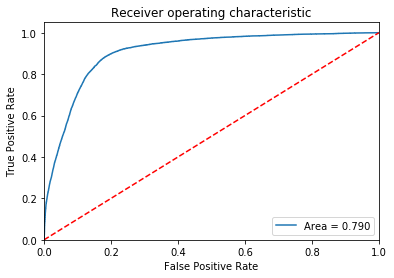

In [58]:
#ROC
plt_roc_curve(gb_1.predict(X_test),gb_1.predict_proba(X_test)[:,1])

### XGBOOST

In [59]:
import xgboost
from xgboost import XGBClassifier

In [60]:
xgb_1=XGBClassifier(
 learning_rate =0.1,
 n_estimators=50,
 max_depth=4,
 alpha=3,


)
xgb_1.fit(X_train, Y_train)

print("Accuracy for XGBOOST Training set: %.5f" %(xgb_1.score(X_train,Y_train)))
print("Accuracy for XGBOOST Test set: %.5f" %(xgb_1.score(X_test,Y_test)))

print(confusion_matrix(Y_test,xgb_1.predict(X_test)))
print(classification_report(Y_test,xgb_1.predict(X_test)))

Accuracy for XGBOOST Training set: 0.85901
Accuracy for XGBOOST Test set: 0.86153
[[27773  3087]
 [ 2522  7124]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     30860
           1       0.70      0.74      0.72      9646

    accuracy                           0.86     40506
   macro avg       0.81      0.82      0.81     40506
weighted avg       0.86      0.86      0.86     40506



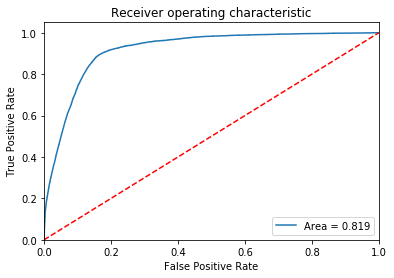

In [61]:
#ROC
plt_roc_curve(xgb_1.predict(X_test),xgb_1.predict_proba(X_test)[:,1])

### Model Selected - XGBOOST

In [88]:
y_pred = list(xgb_1.predict(X))
real_values=list(Y.values)
id_list=to_clf['subid'].values.tolist()

In [94]:
churn_result=pd.DataFrame({'subid':id_list,'pred':y_pred,'real':real_values})
churn_result

,subid,pred,real
0,26844789,0,0
1,29726122,1,1
2,20299962,1,1
3,24930568,0,0
4,21361112,0,0
...,...,...,...
135014,21928274,1,1
135015,25549852,0,0
135016,25835684,0,0
135017,21434712,0,0


In [95]:
churn_result=churn_result.merge(sub[['subid','revenue_net']],how='inner',on='subid')
churn_result

,subid,pred,real,revenue_net
0,26844789,0,0,0.0000
1,29726122,1,1,4.5875
2,20299962,1,1,3.4498
3,24930568,0,0,0.0000
4,21361112,0,0,0.0000
...,...,...,...,...
135014,21928274,1,1,NaN
135015,25549852,0,0,0.0000
135016,25835684,0,0,0.0000
135017,21434712,0,0,0.0000


In [96]:
churn_result['pred'].value_counts()

0    100854
1     34165
Name: pred, dtype: int64

In [97]:
churn_result['real'].value_counts()

0    102664
1     32355
Name: real, dtype: int64

In [98]:
churn_result['revenue_net']=churn_result['revenue_net'].fillna(0)

In [100]:
churn_result['exp_rev']=churn_result['pred']*churn_result['revenue_net']

In [102]:
total_revenue=churn_result['exp_rev'].sum()
total_revenue

90954.82109999999

In [105]:
expected_rev=total_revenue/len(y_pred)
expected_rev

0.6736446063146667

# Customer Segmentation: Clustering

In [74]:
to_cluster=sub[['subid', 'package_type','preferred_genre', 'intended_use', 'weekly_consumption_hour','retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'op_sys',
       'cancel_before_trial_end', 'trial_end_date', 'language']]
to_cluster=to_cluster.reset_index(drop=True)

In [75]:
to_cluster['package_type']=to_cluster['package_type'].fillna('Not_Given')
to_cluster['preferred_genre']=to_cluster['preferred_genre'].fillna('Not_Given')
to_cluster['intended_use']=to_cluster['intended_use'].fillna('Not_Given')
to_cluster['op_sys']=to_cluster['op_sys'].fillna('Not_Given')
to_cluster['weekly_consumption_hour']=to_cluster['weekly_consumption_hour'].fillna(to_cluster['weekly_consumption_hour'].mean())

In [76]:
to_cluster=to_cluster.dropna(axis=0,subset = ['age', 'male_TF'])

In [77]:
to_cluster

,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,retarget_TF,age,male_TF,country,attribution_technical,op_sys,cancel_before_trial_end,trial_end_date,language
1,23383224,base,comedy,access to exclusive content,22.951579,False,70.0,False,UAE,facebook,Not_Given,False,2020-03-16,ar
2,26844789,enhanced,regional,replace OTT,36.001186,False,25.0,True,UAE,organic,iOS,False,2019-12-22,ar
3,29417030,base,drama,replace OTT,20.051667,False,30.0,False,UAE,search,Android,False,2020-02-11,ar
4,26723159,base,comedy,replace OTT,22.951579,False,28.0,False,UAE,discovery,iOS,False,2019-10-20,ar
5,24810928,base,comedy,access to exclusive content,20.051667,False,70.0,False,UAE,bing,Not_Given,True,2020-03-18,ar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,25835684,base,drama,access to exclusive content,24.401536,False,43.0,False,UAE,email,iOS,False,2020-01-16,ar
227623,21434712,enhanced,comedy,supplement OTT,28.751405,False,38.0,False,UAE,facebook,iOS,False,2019-12-02,ar
227624,25843074,enhanced,comedy,replace OTT,27.301448,True,49.0,False,UAE,google_organic,iOS,True,2019-12-21,ar
227625,24799085,base,comedy,access to exclusive content,31.651317,False,45.0,False,UAE,facebook,iOS,True,2020-01-05,ar


In [78]:
to_cluster.columns

Index(['subid', 'package_type', 'preferred_genre', 'intended_use',
       'weekly_consumption_hour', 'retarget_TF', 'age', 'male_TF', 'country',
       'attribution_technical', 'op_sys', 'cancel_before_trial_end',
       'trial_end_date', 'language'],
      dtype='object')

In [79]:
to_cluster['language'].value_counts()

ar    192455
Name: language, dtype: int64

In [80]:
to_cluster=to_cluster[[ 'weekly_consumption_hour','package_type', 'preferred_genre', 'intended_use','retarget_TF','male_TF', 'country',
       'attribution_technical', 'op_sys', 'cancel_before_trial_end']]
to_cluster

,weekly_consumption_hour,package_type,preferred_genre,intended_use,retarget_TF,male_TF,country,attribution_technical,op_sys,cancel_before_trial_end
1,22.951579,base,comedy,access to exclusive content,False,False,UAE,facebook,Not_Given,False
2,36.001186,enhanced,regional,replace OTT,False,True,UAE,organic,iOS,False
3,20.051667,base,drama,replace OTT,False,False,UAE,search,Android,False
4,22.951579,base,comedy,replace OTT,False,False,UAE,discovery,iOS,False
5,20.051667,base,comedy,access to exclusive content,False,False,UAE,bing,Not_Given,True
...,...,...,...,...,...,...,...,...,...,...
227622,24.401536,base,drama,access to exclusive content,False,False,UAE,email,iOS,False
227623,28.751405,enhanced,comedy,supplement OTT,False,False,UAE,facebook,iOS,False
227624,27.301448,enhanced,comedy,replace OTT,True,False,UAE,google_organic,iOS,True
227625,31.651317,base,comedy,access to exclusive content,False,False,UAE,facebook,iOS,True


In [81]:
def get_dummy(data,categorical):
    dummy_df=pd.get_dummies(data,columns=categorical,
                       prefix=categorical,
                       prefix_sep='_',
                       dummy_na=False,
                       drop_first=False)
    return dummy_df

In [82]:
cate=[ 'package_type', 'preferred_genre', 'intended_use','retarget_TF','male_TF', 'country',
       'attribution_technical', 'op_sys', 'cancel_before_trial_end']
dummy_df=get_dummy(to_cluster,cate)
dummy_df

,weekly_consumption_hour,package_type_Not_Given,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_Not_Given,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,...,attribution_technical_search,attribution_technical_tv,attribution_technical_twitter,attribution_technical_vod,attribution_technical_youtube,op_sys_Android,op_sys_Not_Given,op_sys_iOS,cancel_before_trial_end_False,cancel_before_trial_end_True
1,22.951579,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,36.001186,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,20.051667,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
4,22.951579,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5,20.051667,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,24.401536,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
227623,28.751405,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
227624,27.301448,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
227625,31.651317,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


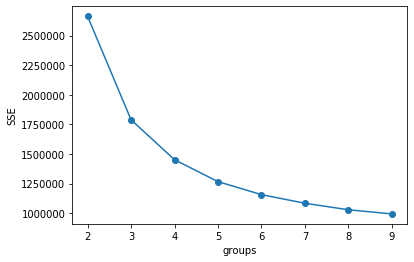

In [83]:
import sklearn.cluster as skc
from sklearn import metrics
import matplotlib.pyplot as plt

distortions=[]
scores=[]
silhouette=[]
for i in range(2,10):
    km = skc.KMeans(n_clusters=i, random_state=1)
    y_pred=km.fit_predict(dummy_df) 
    #scores.append(metrics.calinski_harabaz_score(dummy_df, y_pred))
    distortions.append(km.inertia_)
    #silhouette.append(metrics.silhouette_score(dummy_df, y_pred))

plt.plot(range(2,10),distortions,marker='o')
plt.xlabel('groups')
plt.ylabel("SSE")
plt.show()

In [84]:
km = skc.KMeans(n_clusters=3, random_state=1)
y_pred=km.fit_predict(dummy_df)

r1=pd.Series(km.labels_).value_counts()
r2=pd.DataFrame(km.cluster_centers_)
r=pd.concat([r2,r1],axis=1)
r.columns=list(dummy_df.columns)+[u'类别数目']

r=r.T
r

,0,1,2
weekly_consumption_hour,29.130718,36.057498,23.660027
package_type_Not_Given,0.198190,0.155067,0.183042
package_type_base,0.447849,0.440389,0.464718
package_type_economy,0.080708,0.093539,0.082009
package_type_enhanced,0.273253,0.311006,0.270232
...,...,...,...
op_sys_Not_Given,0.066927,0.069757,0.068602
op_sys_iOS,0.613020,0.602780,0.603014
cancel_before_trial_end_False,0.644099,0.574105,0.672399
cancel_before_trial_end_True,0.355901,0.425895,0.327601
